Bubble Sort

In [1]:
def bubbleSort(array):
    length = len(array)
    for i in range(length - 1):
        swapped = False
        for j in range(length - 1 - i):
            if array[j] > array[j+1]:
                swapped = True
                array[j],array[j+1] = array[j+1],array[j]
        if not swapped :
            return


Insert Sort

In [2]:
def insertionSort(array):
    length = len(array)
    for i in range(1,length):
        key = array[i]
        j = i-1
        while j >= 0 and key < array[j]:
            array[j+1] = array[j]
            j -= 1
        array[j+1] = key

Selection Sort

In [3]:
def selectionSort(array):
    length = len(array)
    for i in range(length-1):
        minIndex = i
        for j in range(i+1, length):
            if array[minIndex] > array[j]:
                minIndex = j
        array[i], array[minIndex] = array[minIndex],array[i] 

Heap Sort

In [6]:
def heapify(array,n,i):
    large = i
    left = 2*i + 1
    right = 2*i + 2
    
    if left < n and array[left] > array[i]:
        large = left
    if right < n and array[right] > array[large]:
        large = right
    if large != i:
        array[large],array[i] = array[i],array[large]
        heapify(array,n,large)

def heapSort(array):
    n = len(array)

    for i in range(n//2,-1,-1):
        heapify(array,n,i)
    
    for i in range(n-1,0,-1):
        array[i],array[0] = array[0],array[i]
        heapify(array,i,0)

Merge Sort

In [18]:
def mergeSort(array):
    if len(array) > 1:
        mid = len(array)//2
        L = array[:mid]
        R = array[mid:]

        mergeSort(L)
        mergeSort(R)
    
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                array[k] = L[i]
                i+= 1
            else:
                array[k] = R[j]
                j+= 1
            k += 1
    
        while i < len(L):
            array[k] = L[i]
            i+= 1
            k+= 1
        while j < len(R):
            array[k] = R[j]
            j+= 1
            k+= 1


Quick Sort

In [20]:
# def partition(arr,L,R):
#     P = arr[R]
#     i = L-1
#     for j in range(L,R):
#         if arr[j] < P:
#             i+= 1
#             arr[i], arr[j] = arr[j], arr[i]
#     arr[i+1], arr[R] = arr[R], arr[i+1]
#     return i+ 1

# def quickSort(arr,L,R):
#     if L < R:
#         q = partition(arr,L,R)
#         quickSort(arr,L,q-1)
#         quickSort(arr,q+1,R)

def quickSort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quickSort(left) + middle + quickSort(right)

Counting Sort

In [9]:
def countingSort(arr):
    size = len(arr)
    maxVal = max(arr)
    minVal = min(arr)
    rangeV = maxVal - minVal + 1

    sortedArr = [0] * size
    countingArr = [0] * rangeV

    for num in arr:
        countingArr[num - minVal] += 1

    for i in range(1,len(countingArr)):
        countingArr[i] += countingArr[i-1]
    
    for num in reversed(arr):
        sortedArr[countingArr[num- minVal] - 1] = num
        countingArr[num - minVal] -= 1
    
    for i in range(size):
        arr[i] = sortedArr[i]



Radix Sort

In [10]:
def countingSort_r10(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10
    
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1
    
    for i in range(1, 10):
        count[i] += count[i - 1]
    
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    
    for i in range(n):
        arr[i] = output[i]

def radixSort(arr):
    max1 = max(arr)

    exp = 1
    while max1 // exp > 0:
        countingSort_r10(arr, exp)
        exp *= 10

Bucket Sort

In [11]:
def bucketSort(arr):
    if len(arr) == 0:
        return arr

    # Determine the number of buckets
    num_buckets = len(arr)
    
    # Create empty buckets
    buckets = [[] for _ in range(num_buckets)]
    
    # Find the range of the input data
    max_value = max(arr)
    min_value = min(arr)
    range_value = (max_value - min_value) / num_buckets
    
    # Distribute elements into buckets
    for i in range(len(arr)):
        index = int((arr[i] - min_value) / range_value)
        if index == num_buckets:  # Handle the edge case where element is the maximum value
            index -= 1
        buckets[index].append(arr[i])
    
    # Sort each bucket using insertion sort
    for i in range(num_buckets):
        insertionSort(buckets[i])
    
    # Concatenate the sorted buckets
    sorted_array = []
    for i in range(num_buckets):
        sorted_array.extend(buckets[i])
    
    return sorted_array

Time Complexity

In [12]:
import time
import random
import matplotlib.pyplot as plt

In [38]:
array_sizes = [100, 200, 500, 1000, 2000, 5000, 10000,20000]
bubble_times = []
insertion_times = []
selection_times = []
heap_times = []
merge_times = []
quick_times = []
counting_times = []
radix_times = []
bucket_times = []

In [39]:
def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    return time.time() - start_time

for size in array_sizes:
    arr = random.sample(range(size * 10), size)
    
    bubble_times.append(measure_time(lambda x: bubbleSort(x.copy()), arr))
    insertion_times.append(measure_time(lambda x: insertionSort(x.copy()), arr))
    selection_times.append(measure_time(lambda x: selectionSort(x.copy()), arr))
    heap_times.append(measure_time(lambda x: heapSort(x.copy()), arr))
    merge_times.append(measure_time(lambda x: mergeSort(x.copy()), arr))
    quick_times.append(measure_time(lambda x: quickSort(x.copy()), arr))
    counting_times.append(measure_time(lambda x: countingSort(x.copy()), arr))
    radix_times.append(measure_time(lambda x: radixSort(x.copy()), arr))
    bucket_times.append(measure_time(lambda x: bucketSort(x.copy()), arr))


In [33]:
print(len(insertion_times))

7


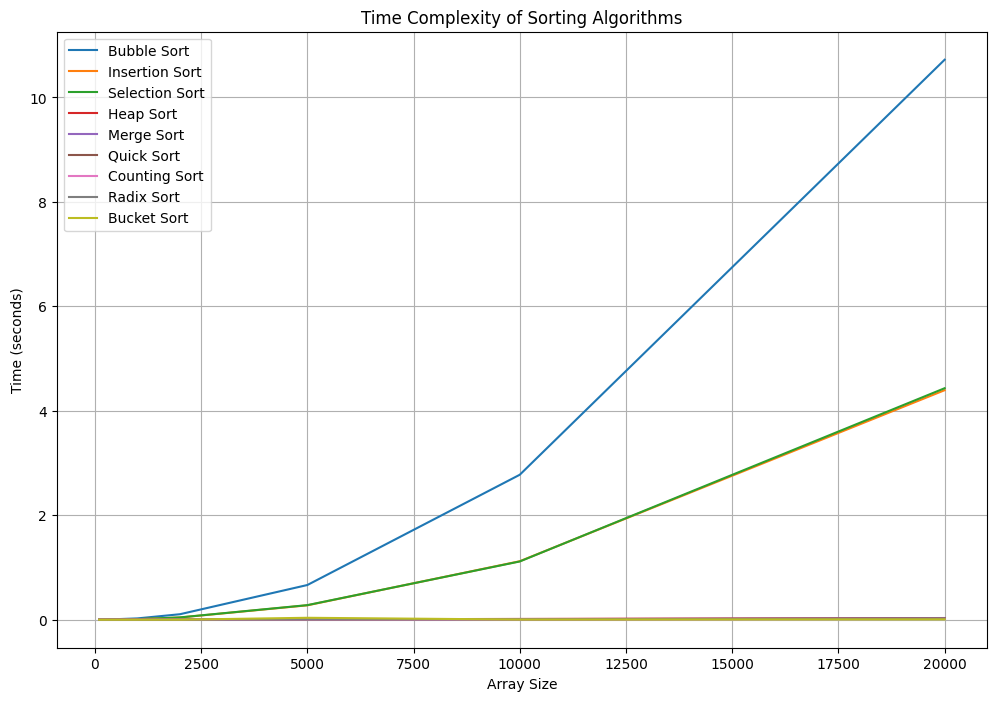

In [40]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(array_sizes, bubble_times, label='Bubble Sort')
plt.plot(array_sizes, insertion_times, label='Insertion Sort')
plt.plot(array_sizes, selection_times, label='Selection Sort')
plt.plot(array_sizes, heap_times, label='Heap Sort')
plt.plot(array_sizes, merge_times, label='Merge Sort')
plt.plot(array_sizes, quick_times, label='Quick Sort')
plt.plot(array_sizes, counting_times, label='Counting Sort')
plt.plot(array_sizes, radix_times, label='Radix Sort')
plt.plot(array_sizes, bucket_times, label='Bucket Sort')

plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Sorting Algorithms')
plt.legend()
plt.grid(True)
plt.show()